# Тема “Обучение без учителя”


### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [70]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [71]:

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()

In [74]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [75]:
tsne_model = TSNE(n_components=2, learning_rate=250, random_state=42)

In [76]:
X_train_tsne = tsne_model.fit_transform(X_train_scaled)

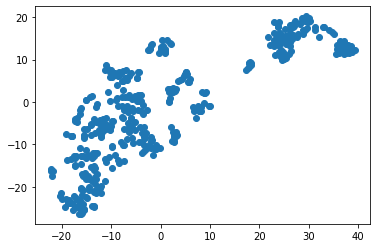

In [77]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2


С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [78]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [79]:
train_labels = model.fit_predict(X_train_scaled)


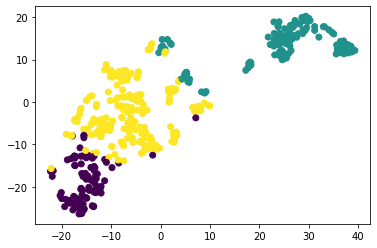

In [80]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [81]:
X_train['CRIM'].mean()

3.609124628712873

In [82]:
X_train['CRIM'][train_labels==0].mean()

0.07356558139534886

In [83]:
X_train['CRIM'][train_labels==1].mean()

10.797028425196853

In [84]:
X_train['CRIM'][train_labels==2].mean()

0.42166020942408367

In [85]:
y_train[train_labels==0].mean()

27.78837209302326

In [86]:
y_train[train_labels==1].mean()

16.165354330708663

In [87]:
y_train[train_labels==2].mean()

24.958115183246072

### *Задание 3


Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [88]:
test_labels = model.fit_predict(X_test_scaled)

In [89]:
X_test['CRIM'][test_labels ==0].mean()

0.08618571428571427

In [90]:
X_test['CRIM'][test_labels ==1].mean()

0.25200716981132076

In [91]:
X_test['CRIM'][test_labels ==2].mean()

10.165531142857143

In [92]:
y_test[test_labels ==0].mean()

33.871428571428574

In [93]:
y_test[test_labels ==1].mean()

21.552830188679245

In [94]:
y_test[test_labels ==2].mean()

16.43714285714286